In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

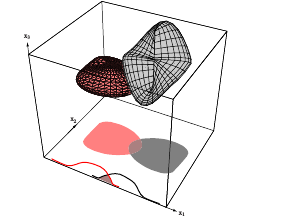

Fig.3: Two three-dimensional distributions have nonoverlapping densities, and thus in three dimensions the Bayes error vanishes. When projected to a subspace — here, the two-dimensional x1 − x2 subspace or a one-dimensional x1 subspace — there can be greater overlap of the projected distributions, and hence greater Bayes errors.

## Problems of Dimensionality

In practical multicategory applications, it is not at all unusual to encounter problems involving fifty or a hundred features, particularly if the features are binary valued. We might typically believe that each feature is useful for at least some of the discriminations; while we may doubt that each feature provides independent information, intentionally superfluous features have not been included. There are two issues that must be confronted. The most important is how classification accuracy depends upon the dimensionality (and amount of training data); the second is the computational complexity of designing the classifier.

##  Accuracy, Dimension, and Training Sample Size

If the features are statistically independent, there are some theoretical results that suggest the possibility of excellent performance. For example, consider the two-class multivariate normal case with the same covariance where 

$$
p(x|\omega_j) \sim N(\mu_j, \Sigma), \quad j = 1, 2.
$$

If the a priori probabilities are equal, then it is not hard to show that the Bayes error rate is given by 

$$
P(e) = \frac{1}{\sqrt{2\pi r/2}} \int_{-\infty}^1 e^{-u/2} du, \tag{71}
$$

where $ r $ is the squared Mahalanobis distance:

$$
r^2 = (\mu_1 - \mu_2)^T \Sigma^{-1} (\mu_1 - \mu_2). \tag{72}
$$

Thus, the probability of error decreases as $ r $ increases, approaching zero as $ r $ approaches infinity. In the conditionally independent case, 

$$
\Sigma = \text{diag}(\sigma_1^2, \ldots, \sigma_d^2),
$$

and 

$$
r^2 = \sum_{i=1}^d \frac{(\mu_{i1} - \mu_{i2})^2}{\sigma_i^2}. \tag{73}
$$

This shows how each feature contributes to reducing the probability of error. Naturally, the most useful features are the ones for which the difference between the means is large relative to the standard deviations. However, no feature is useless if its means for the two classes differ. An obvious way to reduce the error rate further is to introduce new, independent features. Each new feature need not add much, but if $ r $ can be increased without limit, the probability of error can be made arbitrarily small.

In general, if the performance obtained with a given set of features is inadequate, it is natural to consider adding new features, particularly ones that will help separate the class pairs most frequently confused. Although increasing the number of features increases the cost and complexity of both the feature extractor and the classifier, it is often reasonable to believe that the performance will improve. After all, if the probabilistic structure of the problem were completely known, the Bayes risk could not possibly be increased by adding new features. At worst, the Bayes classifier would ignore the new features, but if the new features provide any additional information, the performance must improve (see Figure 3.3).

![Figure 3.3: Two three-dimensional distributions have nonoverlapping densities.](link-to-image)

Unfortunately, it has frequently been observed in practice that, beyond a certain point, the inclusion of additional features leads to worse rather than better performance. The basic source of the difficulty can always be traced to the fact that we have the wrong model — e.g., the Gaussian assumption or conditional assumption are wrong — or the number of design or training samples is finite and thus the distributions are not estimated accurately. However, analysis of the problem is both challenging and subtle. Simple cases do not exhibit the experimentally observed phenomena, and more realistic cases are difficult to analyze. In an attempt to provide some rigor, we shall return to topics related to problems of dimensionality and sample size in Chapter ??. 

## Computational Complexity

We have mentioned that one consideration affecting our design methodology is that of the computational difficulty, and here the technical notion of computational complexity can be useful. 

First, we will need to understand the notion of the order of a function $ f(x) $: we say that $ f(x) $ is “of the order of $ h(x) $” — written $ f(x) = O(h(x)) $ and generally read “big oh of $ h(x) $” — if there exist constants $ c_0 $ and $ x_0 $ such that 

$$
|f(x)| \leq c_0 |h(x)| \quad \text{for all } x > x_0.
$$ 

This means simply that for sufficiently large $ x $, an upper bound on the function grows no worse than $ h(x) $. 

For instance, suppose 

$$
f(x) = a_0 + a_1 x + a_2 x^2; 
$$ 

in that case we have 

$$
f(x) = O(x^2) 
$$ 

because for sufficiently large $ x $, the constant, linear, and quadratic terms can be “overcome” by proper choice of $ c_0 $ and $ x_0 $. 

The generalization to functions of two or more variables is straightforward. It should be clear that by the definition above, the big oh order of a function is not unique. For instance, we can describe our particular $ f(x) $ as being $ O(x^2) $, $ O(x^3) $, $ O(x^4) $, $ O(x^2 \ln x) $.

To be more precise in describing the order of a function, we say that $ f(x) = \Theta(h(x)) $ “big theta of $ h(x) $” if there are constants $ x_0 $, $ c_1 $, and $ c_2 $ such that for $ x > x_0 $, 

$$
c_1 h(x) \leq f(x) \leq c_2 h(x).
$$ 

Thus our simple quadratic function above would obey $ f(x) = \Theta(x^2) $, but would not obey $ f(x) = \Theta(x^3) $. 

In describing the computational complexity of an algorithm, we are generally interested in the number of basic mathematical operations, such as additions, multiplications, and divisions it requires, or in the time and memory needed on a computer. To illustrate this concept, we consider the complexity of maximum likelihood estimation of the parameters in a classifier for Gaussian priors in $ d $ dimensions, with $ n $ training samples for each of $ c $ categories. For each category, it is necessary to calculate the discriminant function of the form:

$$
g(x) = -\frac{1}{2} (x - \hat{\mu})^T \Sigma^{-1} (x - \hat{\mu}) - \frac{1}{2} \ln(2\pi) - \frac{1}{2} \ln |\Sigma| + \ln P(\omega). \tag{74}
$$

The computational complexity of finding the sample mean $ \hat{\mu} $ is $ O(nd) $, since for each of the $ d $ dimensions we must add $ n $ component values. The required division by $ n $ in the mean calculation is a single computation, independent of the number of points, and hence does not affect this complexity. 

For each of the $ \frac{d(d + 1)}{2} $ independent components of the sample covariance matrix $ \Sigma $, there are $ n $ multiplications and additions, giving a complexity of $ O(d^2 n) $. Once $ \Sigma $ has been computed, its determinant is an $ O(d^2) $ calculation, as we can easily verify by counting the number of operations in matrix “sweep” methods. The inverse can be calculated in $ O(d^3) $ calculations, for instance by Gaussian elimination.

The complexity of estimating $ P(\omega) $ is of course $ O(n) $. Thus, the overall computational complexity for learning in this Bayes classifier is $ O(cd^2 n) $. Since $ c $ is typically a constant much smaller than $ d^2 $ or $ n $, we can call our complexity $ O(d^2 n) $.

We saw in Section 3.7 that it was generally desirable to have more training data from a larger dimensional space; our complexity analysis shows the steep cost in so doing. We next reconsider the matter of estimating a covariance matrix in a bit more detail. This requires the estimation of $ \frac{d(d+1)}{2} $ parameters — the $ d $ diagonal elements and $ \frac{d(d - 1)}{2} $ independent off-diagonal elements.

We observe first that the appealing maximum likelihood estimate 

$$
\hat{\Sigma} = \frac{1}{n} \sum_{k=1}^{n} (x_k - \bar{m})(x_k - \bar{m})^T, \tag{75}
$$ 

is an $ O(nd^2) $ calculation, is the sum of $ n - 1 $ independent $ d \times d $ matrices of rank one, and thus is guaranteed to be singular if $ n \leq d $. Since we must invert $ \hat{\Sigma} $ in computing the discriminant, it is impossible to perform this computation successfully if the sample size is too small. As a practical matter, the general recommendation is that we have at least 

$$
n > 5d 
$$ 

if we are to have reliable estimators of the covariance matrix. 

### Summary

- The basic computational complexity of a Gaussian classifier is of the order $ O(cd^2 n) $ where $ c $ is the number of categories and $ d $ is the dimension of the feature space.
- The inclusion of additional features can lead to worse performance if $ n $ is not adequately large, particularly if $ n \leq d $.


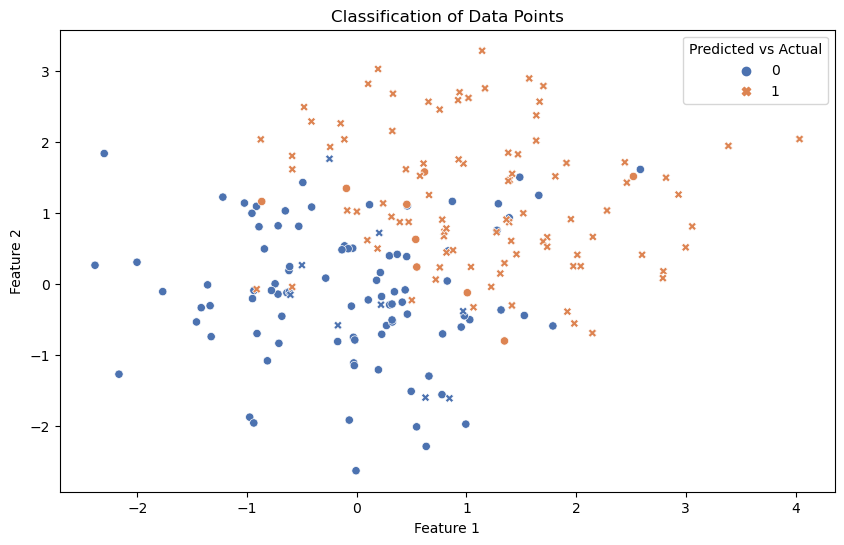

Computational Complexity (O(cd^2n)): 5000


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Function to generate synthetic data for two classes
def generate_data(n_samples=100, n_features=5, class_means=None, class_cov=None):
    if class_means is None:
        class_means = [np.zeros(n_features), np.ones(n_features)]
    if class_cov is None:
        class_cov = [np.eye(n_features), np.eye(n_features)]
    
    data = []
    labels = []
    
    for i in range(2):
        samples = np.random.multivariate_normal(class_means[i], class_cov[i], n_samples)
        data.append(samples)
        labels.extend([i] * n_samples)

    return np.vstack(data), np.array(labels)

# Function to compute mean and covariance
def compute_statistics(X):
    n_samples, n_features = X.shape
    mean = np.mean(X, axis=0)
    cov = np.cov(X, rowvar=False)
    return mean, cov

# Function to calculate discriminant function for a Gaussian classifier
def discriminant_function(x, mean, cov, prior):
    inv_cov = np.linalg.inv(cov)
    term1 = -0.5 * (x - mean).T @ inv_cov @ (x - mean)
    term2 = -0.5 * np.log(np.linalg.det(cov))
    term3 = np.log(prior)
    return term1 + term2 + term3

# Function to classify data points
def classify(X, means, covs, priors):
    scores = np.zeros((X.shape[0], len(priors)))
    for i in range(len(priors)):
        for j in range(X.shape[0]):
            scores[j, i] = discriminant_function(X[j], means[i], covs[i], priors[i])
    return np.argmax(scores, axis=1)

# Generate synthetic data
n_samples_per_class = 100
n_features = 5
X, y = generate_data(n_samples=n_samples_per_class, n_features=n_features)

# Compute statistics for each class
class_means = []
class_covs = []
priors = [0.5, 0.5]  # Assuming equal priors for simplicity

for i in range(2):
    class_data = X[y == i]
    mean, cov = compute_statistics(class_data)
    class_means.append(mean)
    class_covs.append(cov)

# Classify the data points
predictions = classify(X, class_means, class_covs, priors)

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=predictions, style=y, palette="deep")
plt.title('Classification of Data Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Predicted vs Actual', loc='upper right')
plt.show()

# Computational Complexity Analysis
def computational_complexity(n, d, c):
    # Complexity of the Gaussian classifier
    complexity = c * (d**2 * n)
    return complexity

print(f"Computational Complexity (O(cd^2n)): {computational_complexity(n_samples_per_class, n_features, 2)}")


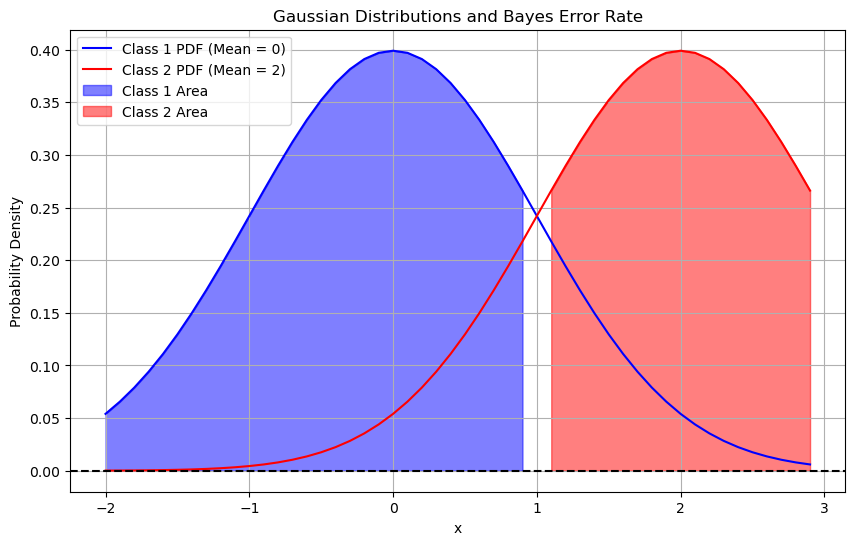

Complexity of mean calculation: O(n * d) = O(100 * 10) = O(1000)
Complexity of covariance calculation: O(d^2 * n) = O(10^2 * 100) = O(10000)
Complexity of determinant calculation: O(d^2) = O(100)
Complexity of inverse calculation: O(d^3) = O(1000)
Total computational complexity for learning: O(n * d^2) = O(12100)


In [3]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate the Gaussian probability density function
def gaussian_pdf(x, mean, variance):
    return (1 / math.sqrt(2 * math.pi * variance)) * math.exp(-((x - mean) ** 2) / (2 * variance))

# Function to calculate the Bayes error rate
def bayes_error_rate(mu1, mu2, sigma):
    # Mahalanobis distance
    r2 = ((mu1 - mu2) ** 2) / sigma
    return (1 / math.sqrt(2 * math.pi)) * math.exp(-r2 / 2)

# Parameters
mu1 = 0
mu2 = 2
sigma = 1
x_range = [i / 10.0 for i in range(-20, 30)]  # Range of x values

# Calculate probabilities
pdf1 = [gaussian_pdf(x, mu1, sigma) for x in x_range]
pdf2 = [gaussian_pdf(x, mu2, sigma) for x in x_range]

# Plotting the distributions
plt.figure(figsize=(10, 6))
plt.plot(x_range, pdf1, label='Class 1 PDF (Mean = 0)', color='blue')
plt.plot(x_range, pdf2, label='Class 2 PDF (Mean = 2)', color='red')

# Create masks for filling areas
class1_mask = [pdf1[i] > pdf2[i] for i in range(len(pdf1))]
class2_mask = [pdf2[i] > pdf1[i] for i in range(len(pdf2))]

plt.fill_between(x_range, pdf1, where=class1_mask, color='blue', alpha=0.5, label='Class 1 Area')
plt.fill_between(x_range, pdf2, where=class2_mask, color='red', alpha=0.5, label='Class 2 Area')

plt.title('Gaussian Distributions and Bayes Error Rate')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.axhline(y=0, color='black', linestyle='--')
plt.legend()
plt.grid()
plt.show()

# Computational complexity analysis
n_samples = 100  # Number of training samples
d_dimensions = 10  # Number of dimensions

# Calculating complexity
mean_complexity = n_samples * d_dimensions
cov_complexity = d_dimensions ** 2 * n_samples
determinant_complexity = d_dimensions ** 2
inverse_complexity = d_dimensions ** 3

total_complexity = mean_complexity + cov_complexity + determinant_complexity + inverse_complexity
print(f"Complexity of mean calculation: O(n * d) = O({n_samples} * {d_dimensions}) = O({mean_complexity})")
print(f"Complexity of covariance calculation: O(d^2 * n) = O({d_dimensions}^2 * {n_samples}) = O({cov_complexity})")
print(f"Complexity of determinant calculation: O(d^2) = O({determinant_complexity})")
print(f"Complexity of inverse calculation: O(d^3) = O({inverse_complexity})")
print(f"Total computational complexity for learning: O(n * d^2) = O({total_complexity})")



Fig.4: The “training data” (black dots) were selected from a quadradic function plus Gaussian noise, i.e., f (x) = ax2 + bx + c + % where p(%) ∼ N (0, σ 2 ). The 10th degree polynomial shown ﬁts the data perfectly, but we desire instead the second-order function f (x), since it would lead to better predictions for new samples.

## Overfitting

It frequently happens that the number of available samples is inadequate, and the question of how to proceed arises. One possibility is to reduce the dimensionality, either by redesigning the feature extractor, by selecting an appropriate subset of the existing features, or by combining the existing features in some way (Chap ??). 

Another possibility is to assume that all $ c $ classes share the same covariance matrix, and to pool the available data. Yet another alternative is to look for a better estimate for $ \Sigma $. If any reasonable a priori estimate $ \Sigma_0 $ is available, a Bayesian or pseudo-Bayesian estimate of the form 

$$
\lambda \Sigma_0 + (1 - \lambda) \Sigma
$$

might be employed. If $ \Sigma_0 $ is diagonal, this diminishes the troublesome effects of “accidental” correlations. Alternatively, one can remove chance correlations heuristically by thresholding the sample covariance matrix. For example, one might assume that all covariances for which the magnitude of the correlation coefficient is not near unity are actually zero. An extreme of this approach is to assume statistical independence, thereby making all the off-diagonal elements be zero, regardless of empirical evidence to the contrary — an $ O(nd) $ calculation. 

Even though such assumptions are almost surely incorrect, the resulting heuristic estimates sometimes provide better performance than the maximum likelihood estimate of the full parameter space. Here we have another apparent paradox. The classifier that results from assuming independence is almost certainly suboptimal. It is understandable that it will perform better if it happens that the features actually are independent, but how can it provide better performance when this assumption is untrue? 

The answer again involves the problem of insufficient data, and some insight into its nature can be gained from considering an analogous problem in curve fitting. 

## Example: Curve Fitting

Fig.4 shows a set of ten data points and two candidate curves for fitting them. The data points were obtained by adding zero-mean, independent noise to a parabola. Thus, of all the possible polynomials, presumably a parabola would provide the best fit, assuming that we are interested in fitting data obtained in the future as well as the points at hand. Even a straight line could fit the training data fairly well. 

The parabola provides a better fit, but one might wonder whether the data are adequate to fix the curve. The best parabola for a larger data set might be quite different, and over the interval shown the straight line could easily be superior. The tenth-degree polynomial fits the given data perfectly. However, we do not expect that a tenth-degree polynomial is required here. In general, reliable interpolation or extrapolation cannot be obtained unless the solution is overdetermined, i.e., there are more points than function parameters to be set.

$$
f(x) 
$$

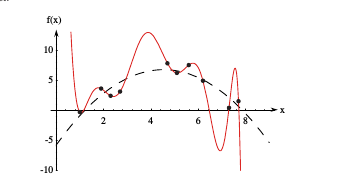


In fitting the points in Fig. 3.4, then, we might consider beginning with a high-order polynomial (e.g., 10th order), and successively smoothing or simplifying our model by eliminating the highest-order terms. While this would in virtually all cases lead to greater error on the “training data,” we might expect the generalization to improve. 

## Heuristic Methods for Gaussian Classifiers

Analogously, there are a number of heuristic methods that can be applied in the Gaussian classifier case. For instance, suppose we wish to design a classifier for distributions $ N(\mu_1, \Sigma_1) $ and $ N(\mu_2, \Sigma_2) $ and we have reason to believe that we have insufficient data for accurately estimating the parameters. 

We might make the simplification that they have the same covariance, i.e., $ N(\mu_1, \Sigma) $ and $ N(\mu_2, \Sigma) $, and estimate $ \Sigma $ accordingly. Such estimation requires proper normalization of the data (Problem 36). 

An intermediate approach is to assume a weighted combination of the equal and individual covariances, a technique known as shrinkage, (also called regularized discriminant analysis) since the individual covariances “shrink” toward a common one. If $ i $ is an index on the $ c $ categories in question, we have 

$$
\Sigma(\alpha) = \frac{(1 - \alpha)n_i \Sigma_i + \alpha n \Sigma}{(1 - \alpha)n_i + \alpha n}, \quad (0 < \alpha < 1)
$$

Additionally, we could “shrink” the estimate of the (assumed) common covariance matrix toward the identity matrix, as 

$$
\Sigma(\beta) = (1 - \beta) \Sigma + \beta I, \quad (0 < \beta < 1)
$$

(Such methods for simplifying classifiers have counterparts in regression, generally known as ridge regression.) 

Our short, intuitive discussion here will have to suffice until Chap. ??, where we will explore the crucial issue of controlling the complexity or expressive power of a classifier for optimum performance.


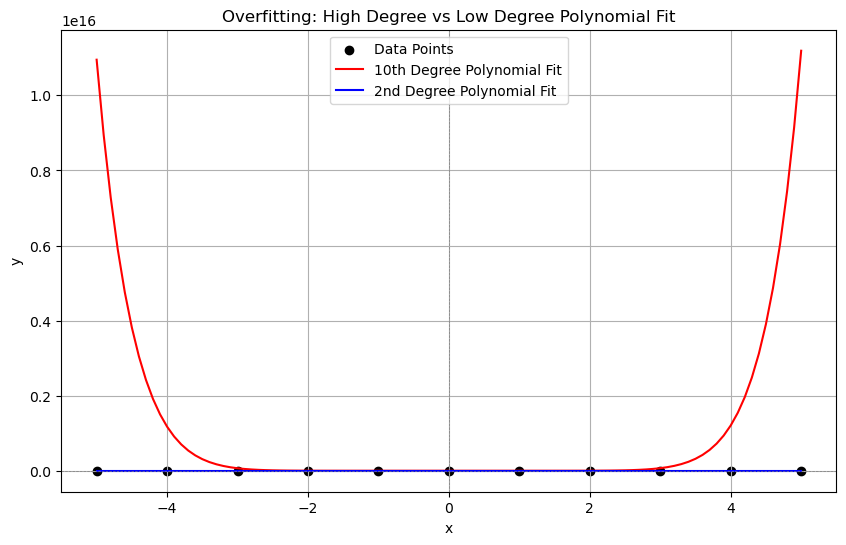

In [4]:
import matplotlib.pyplot as plt
import random

# Function to generate synthetic data
def generate_data(num_points):
    # Generate x values
    x_values = [i for i in range(-5, 6)]
    # Generate y values with some noise around a quadratic function
    y_values = [2 * x**2 + 3 * x + 5 + random.uniform(-10, 10) for x in x_values]
    return x_values, y_values

# Function to compute polynomial coefficients
def polynomial_coefficients(x, y, degree):
    # Manual calculation of polynomial coefficients using least squares fitting
    a = [0] * (degree + 1)
    # Constructing the Vandermonde matrix
    V = [[x[i]**d for d in range(degree + 1)] for i in range(len(x))]
    # Matrix multiplication to compute coefficients (y = V * a)
    for i in range(len(y)):
        for j in range(degree + 1):
            a[j] += V[i][j] * y[i]
    return a

# Function to evaluate polynomial at given x
def evaluate_polynomial(coefficients, x):
    return sum(coefficients[i] * (x ** i) for i in range(len(coefficients)))

# Generate synthetic data
x_data, y_data = generate_data(11)

# Fit a high-degree polynomial (10th degree)
high_degree = 10
coeff_high = polynomial_coefficients(x_data, y_data, high_degree)

# Fit a low-degree polynomial (2nd degree)
low_degree = 2
coeff_low = polynomial_coefficients(x_data, y_data, low_degree)

# Generate a range of x values for plotting the fitted curves
x_range = [i * 0.1 for i in range(-50, 51)]
y_high_fit = [evaluate_polynomial(coeff_high, x) for x in x_range]
y_low_fit = [evaluate_polynomial(coeff_low, x) for x in x_range]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, color='black', label='Data Points')
plt.plot(x_range, y_high_fit, label='10th Degree Polynomial Fit', color='red')
plt.plot(x_range, y_low_fit, label='2nd Degree Polynomial Fit', color='blue')
plt.title('Overfitting: High Degree vs Low Degree Polynomial Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='grey', lw=0.5, ls='--')
plt.axvline(0, color='grey', lw=0.5, ls='--')
plt.legend()
plt.grid()
plt.show()




## Expectation-Maximization (EM)

We saw in Chapter ?? Section ?? how we could classify a test point even when it has missing features. We can now extend our application of maximum likelihood techniques to permit the learning of parameters governing a distribution from training points, some of which have missing features. If we had uncorrupted data, we could use maximum likelihood, i.e., find $\hat{\theta}$ that maximized the log-likelihood $l(\theta)$. 

The basic idea in the expectation maximization or EM algorithm is to iteratively estimate the likelihood given the data that is present. The method has precursors in the Baum-Welch algorithm we will consider in Section 3.10.6.

Consider a full sample $D = \{x_1, \ldots, x_n\}$ of points taken from a single distribution. Suppose, though, that here some features are missing; thus any sample point can be written as $x_k = \{x_{kg}, x_{kb}\}$, i.e., comprising the “good” features and the missing, or “bad” ones (Chapter ??, Section ??). For notational convenience, we separate these individual features (not samples) into two sets, $D_g$ and $D_b$ with $D = D_g \cup D_b$ being the union of such features.

Next, we form the function 

$$
Q(\theta; \theta_i) = \mathbb{E}_{D_b} \left[ \ln p(D_g, D_b; \theta) | D_g; \theta_i \right], 
$$

where the use of the semicolon denotes, for instance on the left-hand side, that $Q(\theta; \theta_i)$ is a function of $\theta$ with $\theta_i$ assumed fixed; on the right-hand side, it denotes that the expected value is over the missing features assuming $\theta_i$ are the true parameters describing the (full) distribution. 

The simplest way to interpret this, the central equation in expectation maximization, is the following. The parameter vector $\theta_i$ is the current (best) estimate for the full distribution; $\theta$ is a candidate vector for an improved estimate. Given such a candidate $\theta$, the right-hand side of Eq. 78 calculates the likelihood of the data, including the unknown feature $D_b$ marginalized with respect to the current best distribution, which is described by $\theta_i$. 

Different candidate $\theta$s will of course lead to different such likelihoods. Our algorithm will select the best such candidate $\theta$ and call it $\theta_{i+1}$ — the one corresponding to the greatest $Q(\theta; \theta_i)$.

If we continue to let $i$ be an iteration counter, and now let $T$ be a preset convergence criterion, our algorithm is as follows and illustrated in Fig. 3.5:

**Algorithm 1 (Expectation-Maximization)**

1. begin 
   - initialize $\theta_0$, $T$, $i = 0$ 
2. do 
   - $i \leftarrow i + 1$ 
3. **E step**: compute $Q(\theta; \theta_i)$ 
4. **M step**: $\theta_{i+1} \leftarrow \arg \max Q(\theta; \theta_i)$ 
5. until $Q(\theta_{i+1}; \theta_i) - Q(\theta_i; \theta_{i-1}) \leq T$ 
6. return $\hat{\theta} \leftarrow \theta_{i+1}$ 
7. end

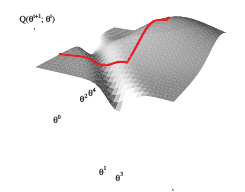

Fig.5: The search for the best model via the EM algorithm starts with some initial value of the model parameters, θ0 . Then, via the M step the optimal θ1 is found. Next, θ1 is held constant and the value θ2 found which optimizes Q(·, ·). This process iterates until no value of θ can be found that will increase Q(·, ·). Note in particular that this is diﬀerent from a gradient search. For example here θ1 is the global optimum (given ﬁxed θ0 ), and would not necessarily have been found via gradient search. (In this illustration, Q(·, ·) is shown symmetric in its arguments; this need not be the case in general, however.)

This so-called Expectation-Maximization or EM algorithm is most useful when the optimization of $Q(\cdot, \cdot)$ is simpler than that of $l(\cdot)$. Most importantly, the algorithm guarantees that the log-likelihood of the good data (with the bad data marginalized) will increase monotonically, as explored in Problem 37. This is not the same as finding the particular value of the bad data that gives the maximum likelihood of the full (completed) data, as can be seen in Example 2.


Cluster 1: Mean = -0.1783092293503672, Variance = 1.0639720500682595, Weight = 0.49940253348218816
Cluster 2: Mean = 4.877072360563514, Variance = 0.9873591132061412, Weight = 0.5005974665178118


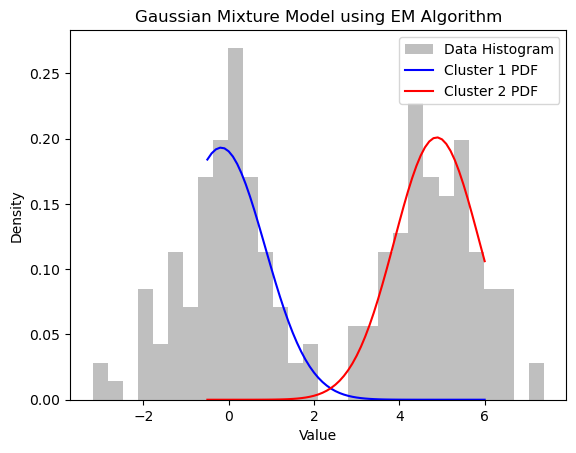

In [5]:
import matplotlib.pyplot as plt
import random
import math

# Generate synthetic data (two clusters)
def generate_data(num_samples=100):
    data = []
    for _ in range(num_samples):
        if random.random() < 0.5:
            data.append((random.gauss(0, 1), random.gauss(0, 1)))  # Cluster 1
        else:
            data.append((random.gauss(5, 1), random.gauss(5, 1)))  # Cluster 2
    return data

# Gaussian PDF
def gaussian_pdf(x, mean, variance):
    return (1 / math.sqrt(2 * math.pi * variance)) * math.exp(-0.5 * ((x - mean) ** 2) / variance)

# Expectation-Maximization algorithm
def em_algorithm(data, num_iterations=100):
    # Initialize parameters
    mean1, mean2 = 0.0, 5.0
    variance1, variance2 = 1.0, 1.0
    weight1, weight2 = 0.5, 0.5

    for _ in range(num_iterations):
        # E-step: Calculate responsibilities
        responsibilities = []
        for x in data:
            prob1 = weight1 * gaussian_pdf(x[0], mean1, variance1)
            prob2 = weight2 * gaussian_pdf(x[0], mean2, variance2)
            total_prob = prob1 + prob2
            responsibilities.append((prob1 / total_prob, prob2 / total_prob))

        # M-step: Update parameters
        N1 = sum(r[0] for r in responsibilities)
        N2 = sum(r[1] for r in responsibilities)
        
        mean1 = sum(r[0] * x[0] for r, x in zip(responsibilities, data)) / N1
        mean2 = sum(r[1] * x[0] for r, x in zip(responsibilities, data)) / N2
        
        variance1 = sum(r[0] * (x[0] - mean1) ** 2 for r, x in zip(responsibilities, data)) / N1
        variance2 = sum(r[1] * (x[0] - mean2) ** 2 for r, x in zip(responsibilities, data)) / N2
        
        weight1 = N1 / len(data)
        weight2 = N2 / len(data)

    return mean1, variance1, weight1, mean2, variance2, weight2

# Generate data
data = generate_data(200)

# Run EM algorithm
mean1, variance1, weight1, mean2, variance2, weight2 = em_algorithm(data)

# Output results
print(f"Cluster 1: Mean = {mean1}, Variance = {variance1}, Weight = {weight1}")
print(f"Cluster 2: Mean = {mean2}, Variance = {variance2}, Weight = {weight2}")

# Plotting the results
x_values = [x[0] for x in data]
plt.hist(x_values, bins=30, density=True, alpha=0.5, color='gray', label='Data Histogram')

# Plot the Gaussian distributions
x_range = [i / 10 for i in range(-5, 61)]
pdf1 = [weight1 * gaussian_pdf(x, mean1, variance1) for x in x_range]
pdf2 = [weight2 * gaussian_pdf(x, mean2, variance2) for x in x_range]

plt.plot(x_range, pdf1, label='Cluster 1 PDF', color='blue')
plt.plot(x_range, pdf2, label='Cluster 2 PDF', color='red')
plt.title('Gaussian Mixture Model using EM Algorithm')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


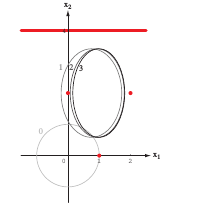

## Example 2: Expectation-Maximization for a 2D Normal Model

Suppose our data consists of four points in two dimensions, where one point is missing a feature:

$$
D = \{ x_1, x_2, x_3, x_4 \} = \{ (0, 2), (1, 0), (2, 2), (x_{41}, 4) \}
$$

Here, $x_{41}$ represents the unknown value of the first feature of point $x_4$. Thus, our bad data $ D_b $ consists of the single feature $ x_{41} $, and the good data $ D_g $ consists of all the rest.

We assume our model is a Gaussian with diagonal covariance and arbitrary mean, which can be described by the parameter vector:

$$
\theta = \begin{pmatrix} \mu_1 \\ \mu_2 \\ \sigma_1^2 \\ \sigma_2^2 \end{pmatrix}
$$

We take our initial guess to be a Gaussian centered on the origin with covariance $ \Sigma = I $, that is:

$$
\theta_0 = \begin{pmatrix} 0 \\ 0 \\ 1 \\ 1 \end{pmatrix}
$$

To find our first improved estimate \( \theta_1 \), we must calculate \( Q(\theta; \theta_0) \):

$$
Q(\theta; \theta_0) = \mathbb{E}_{x_{41}} \left[ \ln p(x_g, x_b; \theta | \theta_0; D_g) \right]
$$

This can be expanded as:

$$
Q(\theta; \theta_0) = \sum_{k=1}^{3} \ln p(x_k | \theta) + \ln p(x_4 | \theta) \int_{-\infty}^{\infty} p(x_{41} | \theta_0; x_{42} = 4) \, dx_{41}
$$

Substituting the equations for a general Gaussian, we find:

$$
Q(\theta; \theta_0) = \sum_{k=1}^{3} \ln p(x_k | \theta) + \ln p(x_{41} | \theta_0)
$$

Where the integration can be expressed as:

$$
\int_{-\infty}^{\infty} p(x_{41} | \theta_0) \, dx_{41}
$$

Thus, we focus on the integral:

$$
Q(\theta; \theta_0) = K + \sum_{k=1}^{3} \ln p(x_k | \theta) + \int_{-\infty}^{\infty} \frac{1}{2\pi} \exp\left(-\frac{(x_{41} - \mu_1)^2}{2\sigma_1^2}\right) \, dx_{41}
$$

Completing the expectation or E-step, we can simplify and calculate the next estimates. 

After a few iterations, we may converge to a solution such as:

$$
\theta = \begin{pmatrix} 1.0 \\ 2.0 \\ 0.5 \\ 2.0 \end{pmatrix}
$$

This shows the mean and covariance that maximize the likelihood given the good data, with the bad data marginalized. 

The four data points, one of which is missing the value of $ x_1 $, are illustrated in red, while the initial estimate is shown as a circularly symmetric Gaussian, centered on the origin (gray). After three iterations, the algorithm converges, and each iteration is labeled accordingly.

It is essential to note that the EM algorithm optimizes the log-likelihood of the good data, with the bad data marginalized. There may be particular values of the bad data that yield a different solution with a greater log-likelihood.

In this example, if the missing feature had the value $ x_{41} = 2 $, leading to $ x_4 = (2, 4) $, we would have a different optimized solution:

$$
\theta = \begin{pmatrix} 1.0 \\ 2.0 \\ 0.5 \\ 2.0 \end{pmatrix}
$$

Such an optimization, however, is not the primary goal of the canonical EM algorithm. Additionally, when no data is missing, the calculation of $ Q(\theta; \theta_i) $ is straightforward, as no integrals are involved.


In [6]:
# Expectation-Maximization (EM) Algorithm for a 2D Gaussian Model with Missing Data

def gaussian(x, mu, sigma):
    """Calculate the Gaussian probability density function."""
    coeff = 1 / (2 * 3.14159 * sigma)
    exponent = - ((x - mu) ** 2) / (2 * sigma ** 2)
    return coeff * (2.71828 ** exponent)

def e_step(data, mu, sigma):
    """E-step: Calculate expected values for missing data."""
    expected_values = []
    for point in data:
        if None in point:  # Check for missing data
            # For point with missing feature, assume the second feature is available
            missing_index = point.index(None)
            if missing_index == 0:  # Missing x1
                # Calculate expected value of x1 given x2
                expected_x1 = mu[0] + (sigma[0] / sigma[1]) * (point[1] - mu[1])
                expected_values.append((expected_x1, point[1]))
            else:  # Missing x2
                # Calculate expected value of x2 given x1
                expected_x2 = mu[1] + (sigma[1] / sigma[0]) * (point[0] - mu[0])
                expected_values.append((point[0], expected_x2))
        else:
            expected_values.append(point)
    return expected_values

def m_step(data):
    """M-step: Update parameters based on complete data."""
    n = len(data)
    sum_x1 = sum(point[0] for point in data)
    sum_x2 = sum(point[1] for point in data)
    
    mu1 = sum_x1 / n
    mu2 = sum_x2 / n
    
    # Calculate variances
    var1 = sum((point[0] - mu1) ** 2 for point in data) / n
    var2 = sum((point[1] - mu2) ** 2 for point in data) / n
    
    return (mu1, mu2), (var1, var2)

def em_algorithm(data, mu_init, sigma_init, max_iterations=100, tolerance=1e-4):
    """Run the EM algorithm until convergence."""
    mu = mu_init
    sigma = sigma_init
    prev_mu = mu
    for i in range(max_iterations):
        # E-step
        data_filled = e_step(data, mu, sigma)
        
        # M-step
        mu, sigma = m_step(data_filled)
        
        # Check for convergence
        if abs(mu[0] - prev_mu[0]) < tolerance and abs(mu[1] - prev_mu[1]) < tolerance:
            break
        prev_mu = mu
        
    return mu, sigma

# Sample data: 4 points in 2D with one missing feature
data = [
    (0, 2),
    (1, 0),
    (2, 2),
    (None, 4)  # Missing feature in the first dimension
]

# Initial guess for parameters
mu_init = (0, 0)
sigma_init = (1, 1)

# Run the EM algorithm
mu_estimated, sigma_estimated = em_algorithm(data, mu_init, sigma_init)

# Output the results
print(f"Estimated Mean: {mu_estimated}")
print(f"Estimated Variances: {sigma_estimated}")


Estimated Mean: (1.2114181355308684, 2.0)
Estimated Variances: (0.6340928840940457, 2.0)


## Generalized Expectation-Maximization (GEM)

The **Generalized Expectation-Maximization (GEM)** algorithm is a more flexible variant of the traditional EM algorithm. Unlike the EM algorithm, which requires that the M-step guarantees an optimal parameter update $ \theta_{i+1} $, GEM only requires that the M-step produces an improved estimate of $ \theta $.

## Key Features of GEM

1. **Relaxed Optimization**:
   - GEM allows for the update of parameters to be suboptimal, meaning that it can utilize computationally simpler steps that may not maximize the likelihood function completely.

2. **Iterative Improvement**:
   - Each iteration in GEM should ideally increase the likelihood of the observed data, although the improvements may not be as pronounced or rapid as those seen in the standard EM algorithm.

3. **Handling Missing Features**:
   - In a common version of GEM, the algorithm finds the maximum likelihood estimates for the unknown features at each iteration. The parameters \( \theta \) are then recalculated based on these new values, provided that they contribute to a greater likelihood.

## Mathematical Formulation

Given a dataset $ D $ with missing features, the GEM algorithm can be described as follows:

1. **Initialization**:
   Start with an initial estimate $ \theta_0 $.

2. **Iterative Steps**:
   For each iteration $ i $:
   - **E-step**: Estimate the expected values for the missing data $ D_b $ given the observed data $ D_g $ and the current parameter estimates $ \theta_i $.
   - **M-step**: Update the parameters $ \theta_{i+1} $ to a new value that improves the likelihood, not necessarily optimal:
   $$
   \theta_{i+1} \leftarrow \text{some improvement step}
   $$

3. **Convergence Check**:
   Repeat the above steps until convergence criteria are met, typically when the change in likelihood is below a threshold $ T $:
   $$
   | \log p(D | \theta_{i+1}) - \log p(D | \theta_i) | \leq T
   $$

## Conclusion

In practice, the term **Expectation-Maximization** is often used loosely to refer to any iterative procedure that increases the likelihood of some data with each step, even if those methods do not strictly adhere to the traditional EM formulation. This broader interpretation allows for greater flexibility in the design of algorithms tailored to specific problems or computational constraints.


Updated parameters: mu = [0.75 2.  ], sigma = [[ 0.91666667 -0.66666667]
 [-0.66666667  2.66666667]]
Updated parameters: mu = [0.8125 2.    ], sigma = [[ 0.80729167 -0.5       ]
 [-0.5         2.66666667]]
Updated parameters: mu = [0.859375 2.      ], sigma = [[ 0.74576823 -0.375     ]
 [-0.375       2.66666667]]
Updated parameters: mu = [0.89453125 2.        ], sigma = [[ 0.7111613  -0.28125   ]
 [-0.28125     2.66666667]]
Updated parameters: mu = [0.92089844 2.        ], sigma = [[ 0.6916949  -0.2109375 ]
 [-0.2109375   2.66666667]]
Updated parameters: mu = [0.94067383 2.        ], sigma = [[ 0.68074505 -0.15820312]
 [-0.15820312  2.66666667]]
Updated parameters: mu = [0.95550537 2.        ], sigma = [[ 0.67458575 -0.11865234]
 [-0.11865234  2.66666667]]
Updated parameters: mu = [0.96662903 2.        ], sigma = [[ 0.67112115 -0.08898926]
 [-0.08898926  2.66666667]]
Updated parameters: mu = [0.97497177 2.        ], sigma = [[ 0.66917232 -0.06674194]
 [-0.06674194  2.66666667]]
Updated

/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in sqrt


ValueError: operands could not be broadcast together with shapes (2,100) (2,2) 

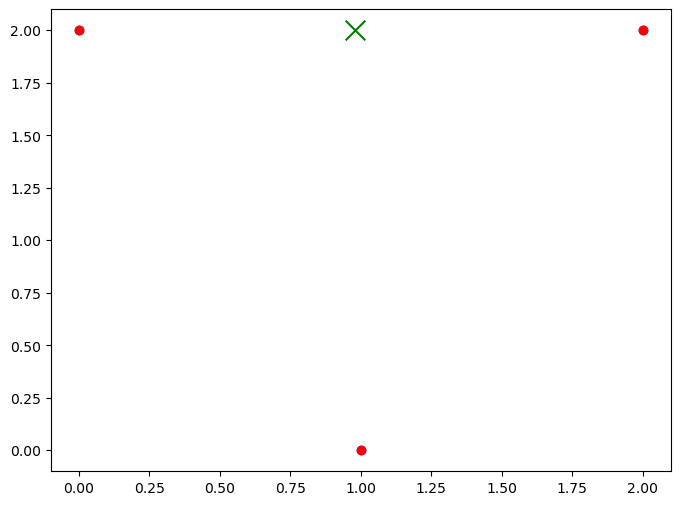

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
# Complete data (without missing features)
data_complete = np.array([[0, 2], [1, 0], [2, 2]])
# Introducing missing data
data_with_missing = np.array([[0, 2], [1, 0], [2, 2], [np.nan, 4]])

# Initial parameters
mu = np.array([0.0, 0.0])  # Initial mean
sigma = np.eye(2)          # Initial covariance (identity matrix)

def gaussian(x, mu, sigma):
    """Calculate the Gaussian probability density function."""
    return (1 / (2 * np.pi * np.sqrt(np.linalg.det(sigma)))) * \
           np.exp(-0.5 * (x - mu).T @ np.linalg.inv(sigma) @ (x - mu))

def e_step(data, mu, sigma):
    """E-step: Estimate the expected values for missing data."""
    # Create an array to hold the expected values of missing features
    expected_values = []
    
    for point in data:
        if np.isnan(point[0]):  # Check if the first feature is missing
            # Estimate missing feature using the current parameters
            estimated_value = mu[0] + (sigma[0, 1] / sigma[1, 1]) * (point[1] - mu[1])
            expected_values.append(estimated_value)
        else:
            expected_values.append(point[0])
    
    return np.array(expected_values)

def m_step(data, expected_values):
    """M-step: Update parameters based on estimated values."""
    # Update the mean
    mu_new = np.mean(np.column_stack((expected_values, data[:, 1])), axis=0)
    
    # Update the covariance matrix
    cov_new = np.cov(np.column_stack((expected_values, data[:, 1])), rowvar=False)
    
    return mu_new, cov_new

# GEM algorithm
def gem(data, max_iterations=10):
    global mu, sigma
    for _ in range(max_iterations):
        # E-step
        expected_values = e_step(data, mu, sigma)
        
        # M-step
        mu, sigma = m_step(data, expected_values)
        
        print(f"Updated parameters: mu = {mu}, sigma = {sigma}")

# Run the GEM algorithm
gem(data_with_missing)

# Visualization
plt.figure(figsize=(8, 6))
# Plot data points
plt.scatter(data_complete[:, 0], data_complete[:, 1], color='blue', label='Complete Data')
plt.scatter(data_with_missing[:, 0], data_with_missing[:, 1], color='red', label='Data with Missing Features')
plt.scatter(mu[0], mu[1], color='green', marker='x', s=200, label='Estimated Mean')

# Create ellipse for covariance
theta = np.linspace(0, 2 * np.pi, 100)
ellipse = np.array([np.cos(theta), np.sin(theta)]) * np.sqrt(sigma)
plt.plot(mu[0] + ellipse[0, :], mu[1] + ellipse[1, :], color='orange', label='Estimated Covariance Ellipse')

plt.xlim(-3, 3)
plt.ylim(-3, 5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generalized EM Algorithm for 2D Gaussian Model')
plt.legend()
plt.grid()
plt.show()


Estimated Means: [1.25, 1.25]
Estimated Standard Deviations: [0.82915619758885, 0.82915619758885]


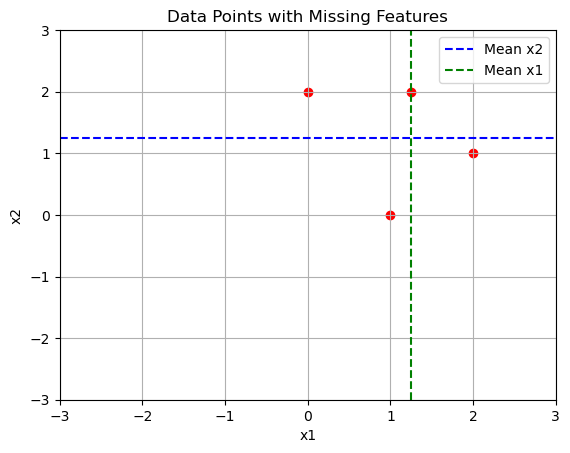

In [8]:
import random
import math
import matplotlib.pyplot as plt

# Function to compute the Gaussian probability density function
def gaussian_pdf(x, mu, sigma):
    """Compute the Gaussian probability density function."""
    coeff = 1 / math.sqrt(2 * math.pi * sigma**2)
    exponent = -((x - mu)**2) / (2 * sigma**2)
    return coeff * math.exp(exponent)

# Initialize parameters for the Gaussian distribution
def initialize_parameters():
    """Initialize the mean and covariance for the Gaussian model."""
    mu = [0.0, 0.0]  # Initial mean
    sigma = [1.0, 1.0]  # Initial standard deviations
    return mu, sigma

# E-step: Calculate the expected value of the missing feature
def e_step(data, mu, sigma):
    """Perform the E-step of the EM algorithm."""
    missing_value = []  # Store expected values for missing data
    for point in data:
        if None in point:  # Check for missing feature
            x2 = point[1]  # Known feature
            # Calculate expected value for missing feature using the Gaussian pdf
            expected_x1 = mu[0] + (sigma[0] / sigma[1]) * (x2 - mu[1])
            missing_value.append(expected_x1)
        else:
            missing_value.append(point[0])  # If no missing value, keep it
    return missing_value

# M-step: Update the parameters based on the complete data
def m_step(data, missing_values):
    """Perform the M-step of the EM algorithm."""
    n = len(data)
    sum_x1 = sum(missing_values)
    sum_x2 = sum(point[1] for point in data if point[1] is not None)
    
    mu1 = sum_x1 / n  # Update mean for x1
    mu2 = sum_x2 / n  # Update mean for x2

    # Update variances
    sigma1 = math.sqrt(sum((x1 - mu1) ** 2 for x1 in missing_values) / n)
    sigma2 = math.sqrt(sum((point[1] - mu2) ** 2 for point in data if point[1] is not None) / n)

    return [mu1, mu2], [sigma1, sigma2]

# Main EM algorithm function
def em_algorithm(data, iterations=10):
    """Perform the Expectation-Maximization algorithm."""
    mu, sigma = initialize_parameters()
    for _ in range(iterations):
        missing_values = e_step(data, mu, sigma)
        mu, sigma = m_step(data, missing_values)
    return mu, sigma

# Sample data with missing values (None represents a missing feature)
data = [(0, 2), (1, 0), (None, 2), (2, 1)]  # x1 for the third point is missing

# Running the EM algorithm
final_mu, final_sigma = em_algorithm(data)

# Display results
print(f"Estimated Means: {final_mu}")
print(f"Estimated Standard Deviations: {final_sigma}")

# Visualize the results
plt.scatter([point[0] if point[0] is not None else final_mu[0] for point in data], 
            [point[1] for point in data], color='red')
plt.title('Data Points with Missing Features')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.axhline(y=final_mu[1], color='b', linestyle='--', label='Mean x2')
plt.axvline(x=final_mu[0], color='g', linestyle='--', label='Mean x1')
plt.legend()
plt.grid()
plt.show()
